In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split

In [3]:
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")

In [4]:
X=df.drop(columns=["cnt","casual","registered","dteday","atemp","yr","instant"],axis=1)
y_registered=df["registered"]
y_casual=df["casual"]
X_train,X_test,y_reg_train,y_reg_test=train_test_split(X,y_registered,test_size=0.2,random_state=42)#Splitting data equally and changes in X_train and y_reg train are ignored
_,_,y_cas_train,y_cas_test=train_test_split(X,y_casual,test_size=0.2,random_state=42)

In [5]:
model_reg=LinearRegression()
model_cas=LinearRegression()
model_reg.fit(X_train, y_reg_train)
model_cas.fit(X_train, y_cas_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
pred_reg = model_reg.predict(X_test)
pred_cas = model_cas.predict(X_test)
pred_cnt = pred_reg + pred_cas

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse_cnt = mean_squared_error(y_reg_test + y_cas_test, pred_cnt)
print(f"MSE for cnt (via sum of two models): {mse_cnt}")

MSE for cnt (via sum of two models): 1802098.9133526157


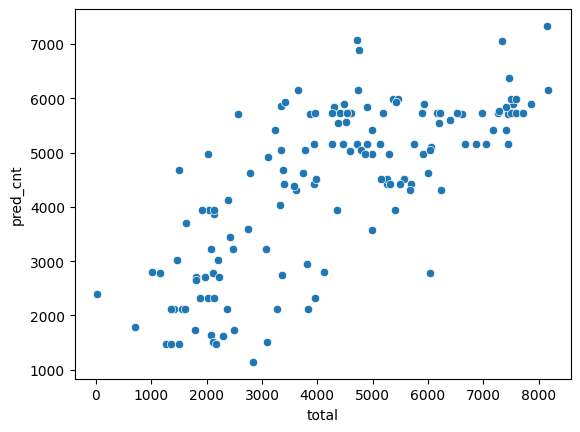

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
total = y_reg_test + y_cas_test
df_plot = pd.DataFrame({
    "total": total,
    "pred_cnt": pred_cnt
})
sns.scatterplot(x="total", y="pred_cnt", data=df_plot)
plt.show()

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
r2 = r2_score(df_plot["total"], df_plot["pred_cnt"])
rmse = np.sqrt(mean_squared_error(df_plot["total"], df_plot["pred_cnt"]))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.5506
RMSE: 1342.42


In [12]:
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_reg_train,y_reg_test=train_test_split(X,y_registered,test_size=0.2,random_state=42)
_,_,y_cas_train,y_cas_test=train_test_split(X,y_casual,test_size=0.2,random_state=42)

In [25]:
rt_reg=DecisionTreeRegressor(criterion="squared_error",max_depth=1000)
rt_cas=DecisionTreeRegressor(criterion="squared_error",max_depth=1000)
rt_reg.fit(X_train,y_reg_train)
rt_cas.fit(X_train,y_cas_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1000
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [26]:
pred_reg = rt_reg.predict(X_test)
pred_cas = rt_cas.predict(X_test)
pred_cnt = pred_reg + pred_cas

In [27]:
r2 = r2_score(df_plot["total"], df_plot["pred_cnt"])
total_drt=y_reg_test+y_cas_test
rmse = np.sqrt(mean_squared_error(df_plot["total"], df_plot["pred_cnt"]))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.5383
RMSE: 1360.68
